In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

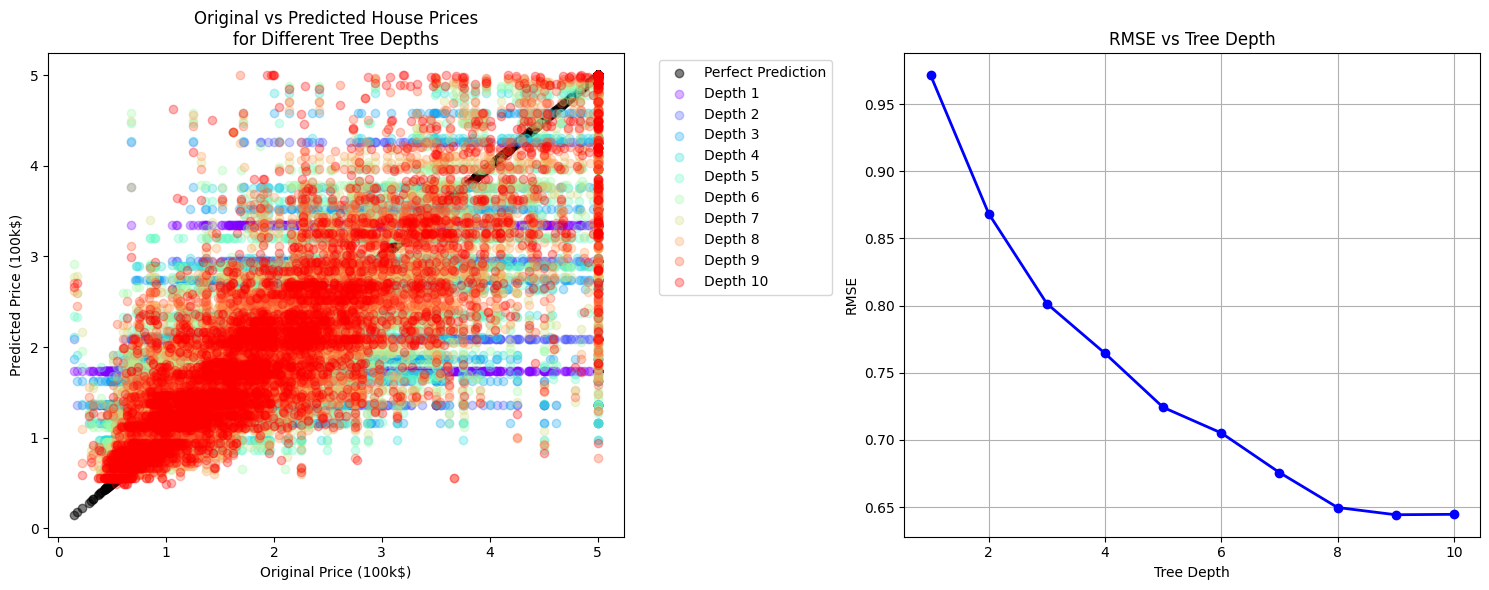


RMSE scores for different tree depths:
Depth 1: 0.9717
Depth 2: 0.8685
Depth 3: 0.8015
Depth 4: 0.7645
Depth 5: 0.7242
Depth 6: 0.7052
Depth 7: 0.6757
Depth 8: 0.6497
Depth 9: 0.6443
Depth 10: 0.6446

Optimal tree depth: 9
Minimum RMSE: 0.6443

Feature Importance:
      Feature  Importance
0      MedInc    0.631555
5    AveOccup    0.131729
6    Latitude    0.075473
7   Longitude    0.058643
1    HouseAge    0.043700
2    AveRooms    0.036752
4  Population    0.011276
3   AveBedrms    0.010872


In [ ]:
housing_data = fetch_california_housing()
X = housing_data.data
y = housing_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
rmse_scores = []
all_preds = []

for depth in depths:
    regressor = DecisionTreeRegressor(max_depth=depth, random_state=42)
    regressor.fit(X_train, y_train)

    preds = regressor.predict(X_test)
    all_preds.append(preds)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    rmse_scores.append(rmse)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test, c='black', label='Perfect Prediction', alpha=0.5)
colors = plt.cm.rainbow(np.linspace(0, 1, len(depths)))

for i, (depth, preds) in enumerate(zip(depths, all_preds)):
    plt.scatter(y_test, preds, c=[colors[i]], label=f'Depth {depth}', alpha=0.3)

plt.xlabel('Original Price (100k$)')
plt.ylabel('Predicted Price (100k$)')
plt.title('Original vs Predicted House Prices\nfor Different Tree Depths')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(depths, rmse_scores, marker='o', color='blue', linewidth=2)
plt.xlabel('Tree Depth')
plt.ylabel('RMSE')
plt.title('RMSE vs Tree Depth')
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nRMSE scores for different tree depths:")
for depth, rmse in zip(depths, rmse_scores):
    print(f"Depth {depth}: {rmse:.4f}")

optimal_depth = depths[np.argmin(rmse_scores)]
print(f"\nOptimal tree depth: {optimal_depth}")
print(f"Minimum RMSE: {min(rmse_scores):.4f}")

best_model = DecisionTreeRegressor(max_depth=optimal_depth, random_state=42)
best_model.fit(X_train, y_train)
importance = pd.DataFrame({
    'Feature': housing_data.feature_names,
    'Importance': best_model.feature_importances_
})
print("\nFeature Importance:")
print(importance.sort_values('Importance', ascending=False))